In [1]:
#Importing the Python Libraries and packages
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb
from scipy import stats

In [2]:
#importing Data
cars = pd.read_csv("mtcars.csv")

In [5]:
#checking data set
print(cars.shape)
cars.head()

(32, 12)


,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
#Linear Regression to predict Mileage mpg using other variables mpg is Target
# Predictor variables hp, wt ( continuours variable)


In [6]:
#Checking assumptions of Linear Reg 1. Linearity of Predictor Variables with Target
cars.corr()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


Range of Skewness, S < |1.96|
Skewness of hp:  0.7614356361333623
Skewness of wt:  0.44378553550607736
Kurtosis of hp:  0.05223272840399584
Kurtosis of wt:  0.1724705401587343


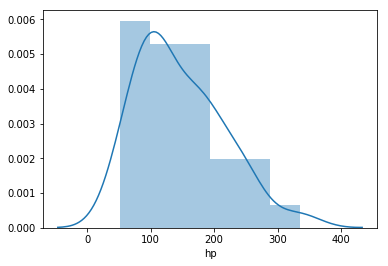

In [13]:
#Checking assumptions of Linear Reg 1. Normality , we shall normality univariate, multivariate is assumed with higher dimension
#Plotting the graph using matplotlibrary 
%matplotlib inline
sb.distplot(cars.hp)
print("Range of Skewness, S < |1.96|")
print("Skewness of hp: ",stats.skew(cars.hp))
print("Skewness of wt: ",stats.skew(cars.wt))
print("Kurtosis of hp: ",stats.kurtosis(cars.hp))
print("Kurtosis of wt: ",stats.kurtosis(cars.wt))
#both hp and wt passing normality test, they are normal values

In [14]:
#Assigning X (independant) and y (dependant) variables
X = cars.loc[:,['hp','wt','am']]
# X assigned for Horse power hp, weight wt, and gear type Automatic or Manual am
y = cars.mpg
# y assigned for mileage
# y is going to vary with independant values like horse power, weight of the vehicle and gear type of the vehicle

In [15]:
# Spliting the training and test set values (training is 85% aand test set is 15%)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=14)

In [16]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (27, 3)
X_test shape (5, 3)
y_train shape (27,)
y_test shape (5,)


In [17]:
#Class is linear regression to fit the model
model_lr = LinearRegression()

In [18]:
model_lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
y_predict = model_lr.predict(X_test)

In [20]:
#Accuracy of the model prediction by using Rsquare or squared error method
r2_score(y_test,y_predict)

0.57408624879804471

In [21]:
y_test

2     22.8
29    19.7
27    30.4
19    33.9
3     21.4
Name: mpg, dtype: float64

In [22]:
y_predict

array([ 25.43866238,  21.26924914,  26.54561075,  27.62999392,  20.28878033])

# Optimize Linear Regression

In [45]:
#check for missing values
cars.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           1
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

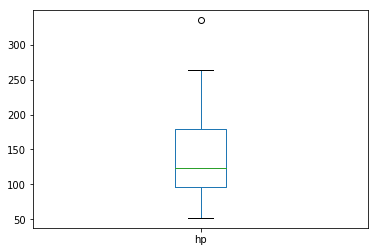

In [24]:
#Outlier analysis using box plot method, outlier => out of the range of value
cars.hp.plot(kind="box")

In [25]:
# Identifying the outlier
cars[cars.hp==cars.hp.max()]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [26]:
# Removing the outlier, the car model which has huge horse power which is out of range compared to other cars
cars_hpoutlier_removed = cars.drop(index=30)

In [27]:
cars_hpoutlier_removed

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [41]:
# outlier removed X and y values
X = cars_hpoutlier_removed.loc[:,['hp','wt','am']]
y = cars_hpoutlier_removed.mpg
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.15,random_state=14)

In [49]:
# Accuracy of the Rsquare model increases to 94 % after removing the outlier 
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)
y_predict = model_lr.predict(X_test)
r2_score(y_test,y_predict)

0.94284985046992265

In [30]:
y_test

2     22.8
18    30.4
15    10.4
3     21.4
26    26.0
Name: mpg, dtype: float64

In [31]:
y_predict

array([ 26.18213439,  29.85272741,  10.31335685,  20.78572346,  26.74804956])

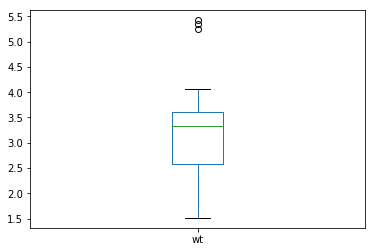

In [34]:
cars.wt.plot(kind='box')